In [1]:
# -My topic was ai and ml in manufacturing as image processing is a part of ml in manufacturing.
# so i have did it as a short topic running my image at different angles
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline

In [2]:
im = plt.imread("BTD.jpg")

im.shape

(4608, 2592, 3)

We can see that image is loaded into an array of dimension 4608 x 2592 x 3.

The first two indices represent the Y and X position of a pixel, and the third represents the RGB colour value of the pixel. Let's take a look at what the image is of

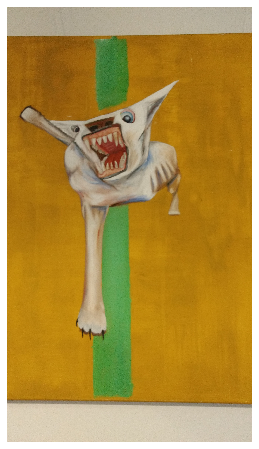

In [3]:
def plti(im, h=8, **kwargs):
    """
    Helper function to plot an image.
    """
    y = im.shape[0]
    x = im.shape[1]
    w = (y/x) * h
    plt.figure(figsize=(w,h))
    plt.imshow(im, interpolation="none", **kwargs)
    plt.axis('off')

plti(im)

We can see that whichever bumbling fool took that photo of the painting also captured a lot of the wall. We can crop the photo so we are only focused on the painting itself. In numpy, this is just a matter of slicing the image array

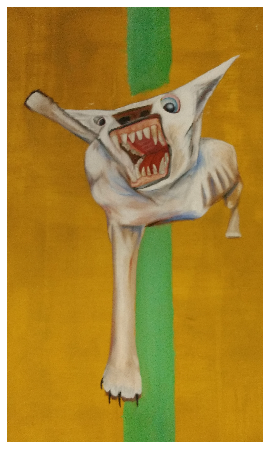

In [4]:
im = im[400:3800,:2000,:]    
plti(im)

# Colours

Each pixel of the image is represented by three integers: the RGB value of its colour. Splitting the image into seperate colour components is just a matter of pulling out the correct slice of the image array:

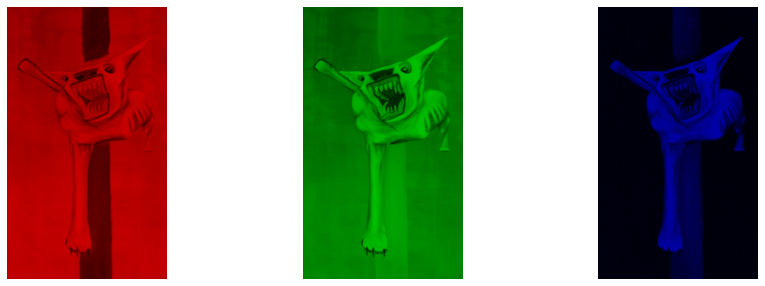

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

for c, ax in zip(range(3), axs):
    tmp_im = np.zeros(im.shape, dtype="uint8")
    tmp_im[:,:,c] = im[:,:,c]
    ax.imshow(tmp_im)
    ax.set_axis_off()

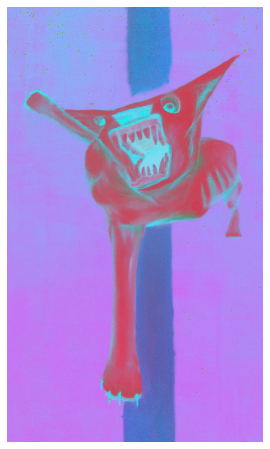

In [6]:
def do_normalise(im):
    return -np.log(1/((1 + im)/257) - 1)
 
def undo_normalise(im):
    return (1 + 1/(np.exp(-im) + 1) * 257).astype("uint8")

def rotation_matrix(theta):
    """
    3D rotation matrix around the X-axis by angle theta
    """
    return np.c_[
        [1,0,0],
        [0,np.cos(theta),-np.sin(theta)],
        [0,np.sin(theta),np.cos(theta)]
    ]

im_normed = do_normalise(im)
im_rotated = np.einsum("ijk,lk->ijl", im_normed, rotation_matrix(np.pi))
im2 = undo_normalise(im_rotated)

plti(im2)

In [ ]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(5,8))

def update(i):
    im_normed = do_normalise(im)
    im_rotated = np.einsum("ijk,lk->ijl", im_normed, rotation_matrix(i * np.pi/10))
    im2 = undo_normalise(im_rotated)
    
    ax.imshow(im2)
    ax.set_title("Angle: {}*pi/10".format(i), fontsize=20)
    ax.set_axis_off()


anim = FuncAnimation(fig, update, frames=np.arange(0, 20), interval=50)
anim.save('colour_rotation.gif', dpi=80, writer='imagemagick')
plt.close()

# <img src="colour_rotation.gif">

MovieWriter imagemagick unavailable; using Pillow instead.


<img src="http://www.degeneratestate.org/static/image-processing-with-numpy/colour_rotation.gif">